<a href="https://colab.research.google.com/github/mohanrajmit/Image-Read/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
#import argparse



In [0]:
def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))

In [0]:
def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))

	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1

	# return the predictions
	return preds


In [0]:
epochs=100
alpha=0.01

In [5]:

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []



[INFO] training...


In [6]:
# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
	# take the dot product between our features `X` and the weight
	# matrix `W`, then pass this value through our sigmoid activation
	# function, thereby giving us our predictions on the dataset
	preds = sigmoid_activation(trainX.dot(W))

	# now that we have our predictions, we need to determine the
	# `error`, which is the difference between our predictions and
	# the true values
	error = preds - trainY
	loss = np.sum(error ** 2)
	losses.append(loss)

	# the gradient descent update is the dot product between our
	# features and the error of the predictions
	gradient = trainX.T.dot(error)

	# in the update stage, all we need to do is "nudge" the weight
	# matrix in the negative direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a set
	# of "more optimal" parameters
	W += alpha * gradient

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))



[INFO] epoch=1, loss=353.6979751
[INFO] epoch=5, loss=471.2216186
[INFO] epoch=10, loss=476.6504499
[INFO] epoch=15, loss=478.8851865
[INFO] epoch=20, loss=479.9941954
[INFO] epoch=25, loss=479.9999985
[INFO] epoch=30, loss=480.0000000
[INFO] epoch=35, loss=480.0000000
[INFO] epoch=40, loss=480.0000000
[INFO] epoch=45, loss=480.0000000
[INFO] epoch=50, loss=480.0000132
[INFO] epoch=55, loss=480.0103930
[INFO] epoch=60, loss=480.7188639
[INFO] epoch=65, loss=480.9966405
[INFO] epoch=70, loss=480.9999709
[INFO] epoch=75, loss=481.0038239
[INFO] epoch=80, loss=481.8898602
[INFO] epoch=85, loss=481.9998814
[INFO] epoch=90, loss=481.9999999
[INFO] epoch=95, loss=482.0000000
[INFO] epoch=100, loss=482.0000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))



[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.08      0.08      0.08       250
           1       0.00      0.00      0.00       250

   micro avg       0.04      0.04      0.04       500
   macro avg       0.04      0.04      0.04       500
weighted avg       0.04      0.04      0.04       500



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


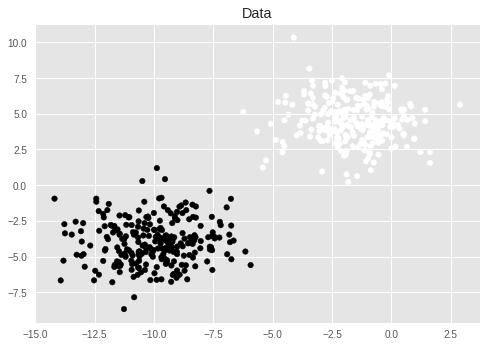

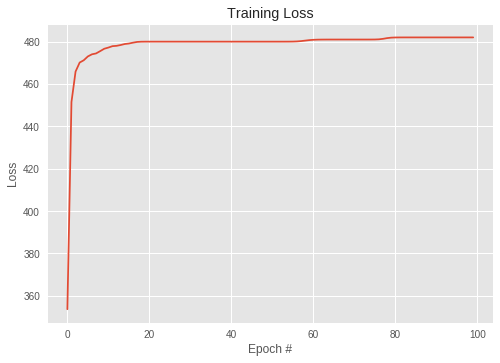

In [8]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(np.expand_dims(testX[:, 0], axis=1), np.expand_dims(testX[:, 1], axis=1), marker="o", c=testY, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()